决策树可视化已保存为 decision_tree_visualization.png
分类准确率: 94.67%
决策树深度: 3
决策树叶节点数: 5
混淆矩阵已保存为 confusion_matrix.png

分类报告:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.92      0.92      0.92        25
           2       0.92      0.92      0.92        25

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75

特征重要性图已保存为 feature_importance.png


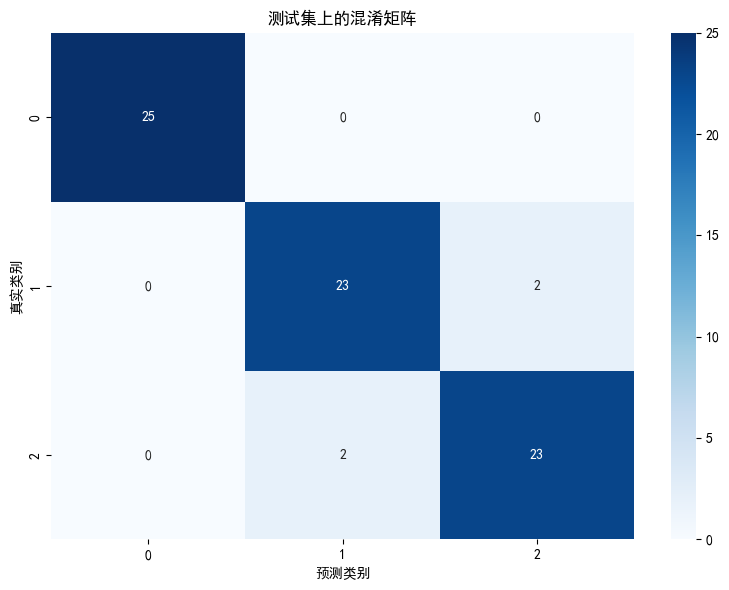

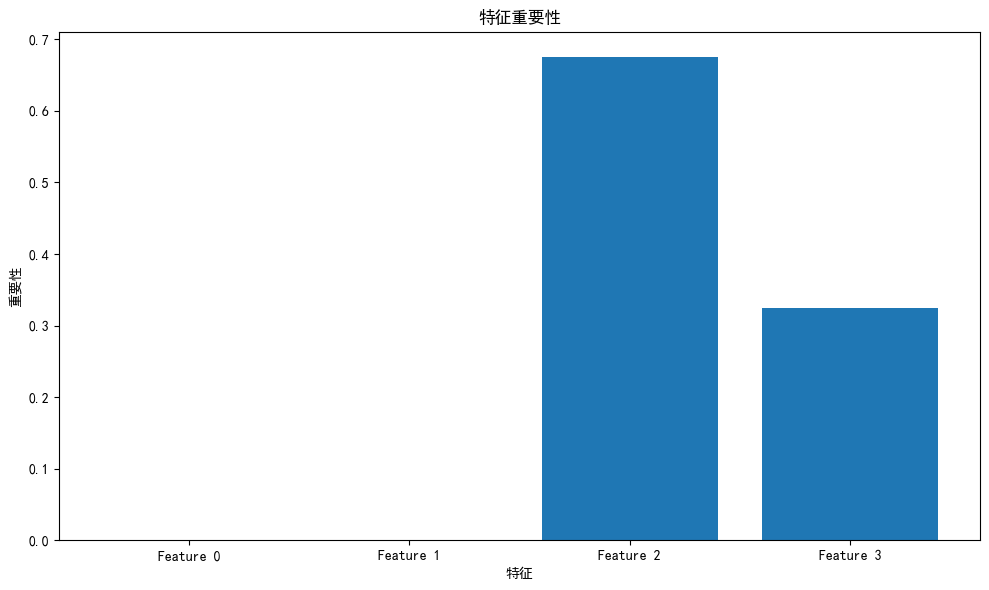

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import graphviz
from IPython.display import display

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 数据读取与预处理
def load_data(filename):
    data = np.loadtxt(filename)
    X = data[:, :-1]
    y = data[:, -1].astype(int)
    return X, y

# 主程序
if __name__ == "__main__":
    # 加载数据
    X_train, y_train = load_data('C:/Users/ASUS/Desktop/大三下/人工智能导论实验/实验五决策树算法/traindata.txt')
    X_test, y_test = load_data('C:/Users/ASUS/Desktop/大三下/人工智能导论实验/实验五决策树算法/testdata.txt')
    
    # 创建决策树模型，因为是ID3，我们使用熵作为信息增益的判断函数
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
    
    # 训练模型
    dt.fit(X_train, y_train)
    
    # 可视化决策树
    dot_data = export_graphviz(
        dt,
        out_file=None,
        feature_names=[f'Feature {i}' for i in range(X_train.shape[1])],
        class_names=[str(i) for i in np.unique(y_train)],
        filled=True,
        rounded=True,
        special_characters=True
    )
    graph = graphviz.Source(dot_data)
    graph.render("decision_tree_visualization", format="png", cleanup=True)
    print("决策树可视化已保存为 decision_tree_visualization.png")
    
    # 预测与评估
    y_pred = dt.predict(X_test)
    accuracy = np.sum(y_pred == y_test) / len(y_test)
    
    print(f"分类准确率: {accuracy*100:.2f}%")
    
    # 输出决策树的一些信息
    print("决策树深度:", dt.get_depth())
    print("决策树叶节点数:", dt.get_n_leaves())
    
    # 计算并显示混淆矩阵
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=np.unique(y_train),
                yticklabels=np.unique(y_train))
    plt.xlabel('预测类别')
    plt.ylabel('真实类别')
    plt.title('测试集上的混淆矩阵')
    plt.tight_layout()
    plt.savefig('confusion_matrix.png')
    print("混淆矩阵已保存为 confusion_matrix.png")
    
    # 计算并显示分类报告
    report = classification_report(y_test, y_pred, target_names=[str(i) for i in np.unique(y_train)])
    print("\n分类报告:")
    print(report)
    
    # 特征重要性
    feature_importance = dt.feature_importances_
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importance)), feature_importance)
    plt.xticks(range(len(feature_importance)), [f'Feature {i}' for i in range(len(feature_importance))])
    plt.xlabel('特征')
    plt.ylabel('重要性')
    plt.title('特征重要性')
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    print("特征重要性图已保存为 feature_importance.png")
    
    # 显示所有图形
    plt.show()
